### Spam Detection on SMS spam Dataset

- main idea - Want to be comfortable both with custom coding and using libraries
- some preprocessing and learning about features
-  data from: https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown !!!!!

df = pd.read_csv('/home/maciej/KURSY/Kaggle/pliki_pomoc/spam.csv', encoding='ISO-8859-1')

In [2]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [3]:
# rename columns
df.columns = ['labels', 'data']

In [4]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [5]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [6]:
# try multiple ways of calculating features
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

# count_vectorizer = CountVectorizer(decode_error='ignore')
# Xtrain = count_vectorizer.fit_transform(df_train)
# Xtest = count_vectorizer.transform(df_test)

so we get back a sparse matrix instead of the usual Numpy array, where we can see all the numbers, as you recall, this is because the array contains a lot of zeros.


In [7]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()

train score: 0.9737476560407179
test score: 0.965742251223491


In [8]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

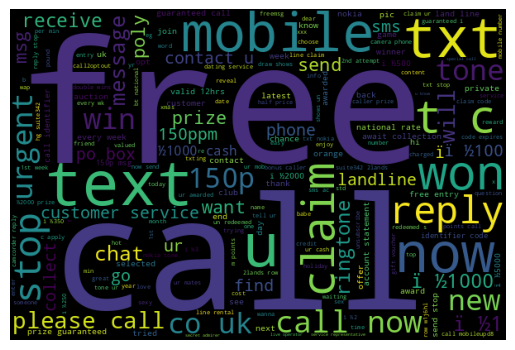

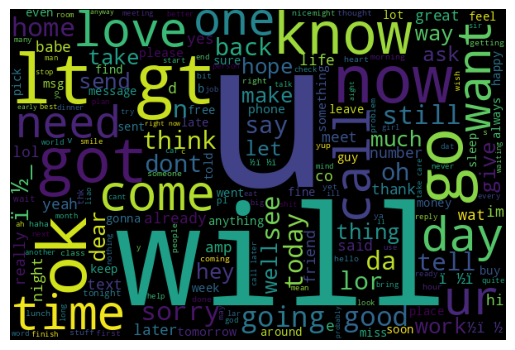

In [9]:
visualize('spam')
visualize('ham')

#or each of the classes, we'll be able to see what are the most common words in a spam/ham message

In [10]:
# see what we're getting wrong
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

In [11]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, ï¿½1.50 to rcv
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Thanks for your subscription to Ringtone UK your mobile will be charged ï¿½5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
Are you unique enough? Find out from 30th August. www.areyouunique.co.uk
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 fi

In [15]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
print(len(not_actually_spam))
for msg in not_actually_spam:
  print(msg)

0
